<a href="https://colab.research.google.com/github/Souha-Kabtni/Sale_Prediction_PART3/blob/main/Souha_Kabtni_Project_1_Part_3_(Core)_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⛳ # The first project will be a sales prediction for food items sold at various stores.
# **The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.**

# **PART 1:**

In [3]:
# 1st: upload the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 2nd: Import my to be used packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# 3rd: Read the fil with pandas
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Week 2/Assingments/sales_predictions_2023.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **PART 2:**

**0. For me to have a general idea of my dataframe**



In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**1. How many rows and columns?**



In [75]:
df.shape # 8523 rows and 12 columns

(8523, 12)

**2. What are the datatypes of each variable?**

In [76]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3. Are there duplicates? If so, drop any duplicates.**


In [77]:
df.duplicated().sum()
# Ths output of the .duplicated().sum() gave 0 ==> We have no duplicated rows to drop in the 1st place

0

**4. Identify missing values.**

In [78]:
df.isna().sum()
# The output gave 2 columns with missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).**

In [79]:
df[df['Item_Weight'].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


Item_Weight contants 1463 missing data, out of (8523*12 = 102276) data values => This represents l,43% of the data => According to the rule of thumb of less then 2% missing values can be dropped, I will drop this column.

In [80]:
df.drop(columns=['Item_Weight'], inplace=True)
df.isna().sum()
# Item_Weight column is now permanently dropped

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [81]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Size contains 2410 missing values, out of (8523*12 = 102276) data values => This represents 2,35% of the data => This exceeds the rule of thumn of 2% => I will not drop this column.

Outlet_Size is of type Object => I will fill data with a new category "Missing"

* I did not opt for fill this categorical data with the most common value in the column since the highest value only represents 32,77% of all values, and is not a value that is overwhelmingly more common than the other values in the same column.

In [82]:
df['Outlet_Size'].fillna('Missing', inplace=True)

**6. Confirm that there are no missing values after addressing them.**

In [83]:
df.isna().sum()
# As per the .isna().sum() diplayed above, all values are cleared from (null) values.

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)**



In [84]:
# Locate my Object columns
df_types = df.dtypes
df_types

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [85]:
# Extraxr my Object columns
str_cols = df_types[df_types=="O"]
str_cols

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [86]:
# find the index of each
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [87]:
df[str_cols.index].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Missing,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [88]:
str_cols = str_cols.index

In [89]:
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [90]:
for col in str_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna=False))
  print("\n\n")


Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, 

Found that Item_Fat_Content column contains both

1. 'Low Fat' and 'LF', which seems to be the same, yet written differently YET read as different values by the program
2. 'Regula' and 'reg', which seems to be the same, yet written differently YET read as different values by the program

=> Replacinng both Low Fat and 'LF' by 'Low_Fat' and 'reg' by 'Regular'


In [91]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF',"Low Fat")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [92]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat',"Low Fat")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [93]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg',"Regular")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**8. For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [94]:
# Get the summary of my data
df_summary = df.describe()
df_summary

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [95]:
# Extraxt the min from the min dataframe, df_summary
display(min)
df_summary.loc['min', :].round()

<function min>

Item_Visibility                 0.0
Item_MRP                       31.0
Outlet_Establishment_Year    1985.0
Item_Outlet_Sales              33.0
Name: min, dtype: float64

In [96]:
# Extraxt the max from the max dataframe, df_summary
display(max)
df_summary.loc['max', :].round()

<function max>

Item_Visibility                  0.0
Item_MRP                       267.0
Outlet_Establishment_Year     2009.0
Item_Outlet_Sales            13087.0
Name: max, dtype: float64

In [97]:
# Extraxt the min from the mean dataframe, df_summary
print('Mean')
df_summary.loc['mean', :].round()

Mean


Item_Visibility                 0.0
Item_MRP                      141.0
Outlet_Establishment_Year    1998.0
Item_Outlet_Sales            2181.0
Name: mean, dtype: float64

# **PART 3**

The goal of this is to help you understand the data as it relates to **the  products and outlets that play crucial roles in increasing sales.**

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


# 1. Ranking through Bar Chart
*I have opted for 3 different graphs to better show that the more details I put, the more detailed my interpretation would be. **bold text**

# a. Step 1: Regualr Bar Chart

# **❎ Justifying my decision of using a horizontal barchart for 'Item_Type': I judge this feature ('Item_Type') to be important in my future predictions of the role it plays in increasing sales.**

In [31]:
# Item_Type: The category to which the product belongs
# horizontal Barchart possibility
# Can be put in a Multivariate with Item_Fat_Content

_Item_types_ = df['Item_Type'].value_counts(ascending=True)
_Item_types_

Seafood                    64
Breakfast                 110
Starchy Foods             148
Others                    169
Hard Drinks               214
Breads                    251
Meat                      425
Soft Drinks               445
Health and Hygiene        520
Baking Goods              648
Canned                    649
Dairy                     682
Frozen Foods              856
Household                 910
Snack Foods              1200
Fruits and Vegetables    1232
Name: Item_Type, dtype: int64

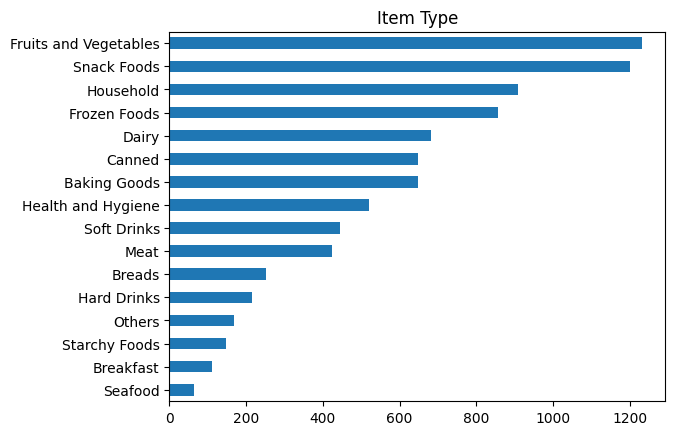

In [32]:
_Item_types_.plot(kind = 'barh')
plt.title('Item Type')
plt.show();

# **✅ Interpretation: The top three item types sold in the stores are: Fruits and vegetables, Snack foods and Household, whereas Starchy food, Breakfast and Seafood are the least sold items.**

# b. Step 2: Bar Chart with 2 variables using groupby

# **❎ Justifying my decision of using a horizontal barchart for 'Item_MRP' grouped by 'Item_Type' : I judge these 2 feature ('Item_MRP' and 'Item_Type') to be important in my future predictions of the role they play in increasing sales.**

In [44]:
# Make a barchart to show the average Item_MRP for each Item_Type.
# (hint: use groupby to groupby the Item_Type and find the average Item_MRP.)

df_ItemType_per_MRP = df.groupby('Item_Type')['Item_MRP'].mean()
df_ItemType_per_MRP

Item_Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Meat                     139.882032
Others                   132.851430
Seafood                  141.841719
Snack Foods              146.194934
Soft Drinks              131.492506
Starchy Foods            147.838023
Name: Item_MRP, dtype: float64

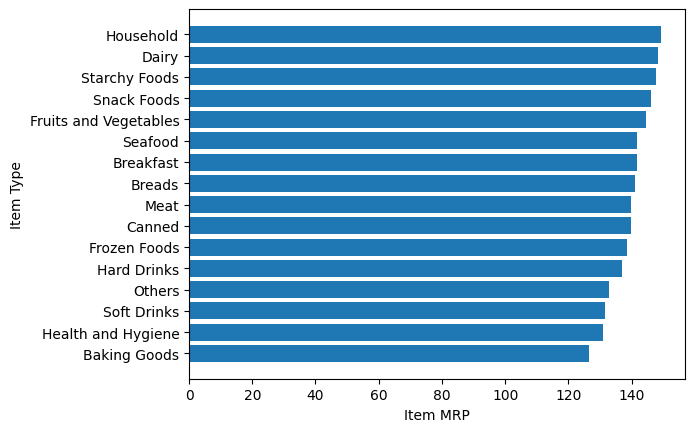

In [56]:
df_ItemType_per_MRP = df_ItemType_per_MRP.sort_values()   # this is added to sort my values in an ascending manner
plt.barh(df_ItemType_per_MRP.index, df_ItemType_per_MRP.values)
plt.ylabel('Item Type')
plt.xlabel('Item MRP')
plt.show()

# **✅ Interpretation: There are no big difference in the MRP of each Item Type. They all range between 125 and 145.**

❎ Justifying my decision of using a horizontal barchart for 'Item_MRP' grouped by 'Item_Type' : I judge these 2 feature ('Item_MRP' and 'Item_Type') to be important in my future predictions of the role they play in increasing sales.

# c. Step 3: Regualr Bar Chart with 3 variables using groupby

In [66]:
# df.groupby(['Class', 'Gender'])['Seat comfort'].mean()

dftest = df.groupby(['Item_Type', 'Item_Fat_Content'])['Item_MRP'].mean()
dftest

Item_Type              Item_Fat_Content
Baking Goods           Low Fat             120.525869
                       Regular             132.419203
Breads                 Low Fat             134.582184
                       Regular             148.987514
Breakfast              Low Fat             165.259673
                       Regular             127.841304
Canned                 Low Fat             139.552518
                       Regular             139.997787
Dairy                  Low Fat             147.115989
                       Regular             150.689305
Frozen Foods           Low Fat             139.019490
                       Regular             137.931307
Fruits and Vegetables  Low Fat             136.558069
                       Regular             152.977571
Hard Drinks            Low Fat             137.077928
Health and Hygiene     Low Fat             130.818921
Household              Low Fat             149.424753
Meat                   Low Fat            

In [116]:
dftest2 = df.groupby(['Item_Type', 'Item_Fat_Content']).mean()
dftest2.head()

<ipython-input-116-5b91af4b999a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dftest2 = df.groupby(['Item_Type', 'Item_Fat_Content']).mean()


Item_Visibility    Item_MRP  \
Item_Type    Item_Fat_Content                                
Baking Goods Low Fat                  0.066150  120.525869   
             Regular                  0.072283  132.419203   
Breads       Low Fat                  0.067815  134.582184   
             Regular                  0.064287  148.987514   
Breakfast    Low Fat                  0.091970  165.259673   

                               Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Type    Item_Fat_Content                                                
Baking Goods Low Fat                         1997.310030        1764.509636  
             Regular                         1998.159875        2147.340665  
Breads       Low Fat                         1997.592857        2183.434031  
             Regular                         1997.738739        2230.238058  
Breakfast    Low Fat                         1997.292683        2425.411966

In [115]:
dftest2 = df.groupby(['Item_Type', 'Item_Fat_Content']).mean().reset_index()
dftest2.head()

<ipython-input-115-d50cbea46358>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dftest2 = df.groupby(['Item_Type', 'Item_Fat_Content']).mean().reset_index()


,Item_Type,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Baking Goods,Low Fat,0.066150,120.525869,1997.310030,1764.509636
1,Baking Goods,Regular,0.072283,132.419203,1998.159875,2147.340665
2,Breads,Low Fat,0.067815,134.582184,1997.592857,2183.434031
3,Breads,Regular,0.064287,148.987514,1997.738739,2230.238058
4,Breakfast,Low Fat,0.091970,165.259673,1997.292683,2425.411966


In [124]:
df.sort_values(by = 'Item_MRP', ascending=False)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4802,FDS13,Low Fat,0.125210,Canned,266.8884,OUT017,2007,Missing,Tier 2,Supermarket Type1,1059.9536
5884,FDR25,Regular,0.139522,Canned,266.8884,OUT046,1997,Small,Tier 1,Supermarket Type1,5034.7796
4159,FDK51,Low Fat,0.008763,Dairy,266.6884,OUT010,1998,Missing,Tier 3,Grocery Store,264.9884
5254,NCS29,Low Fat,0.069488,Health and Hygiene,266.6884,OUT013,1987,High,Tier 3,Supermarket Type1,3974.8260
4538,FDS13,Low Fat,0.217994,Canned,266.5884,OUT019,1985,Small,Tier 1,Grocery Store,1324.9420
...,...,...,...,...,...,...,...,...,...,...,...
2242,FDG40,Low Fat,0.039631,Frozen Foods,31.9558,OUT027,1985,Medium,Tier 3,Supermarket Type3,984.7182
2011,FDX59,Low Fat,0.051618,Breads,31.9558,OUT013,1987,High,Tier 3,Supermarket Type1,373.5138
2135,DRK12,Low Fat,0.042057,Soft Drinks,31.8900,OUT018,2009,Medium,Tier 3,Supermarket Type2,366.1900
6958,DRK12,Low Fat,0.041851,Soft Drinks,31.4900,OUT013,1987,High,Tier 3,Supermarket Type1,466.0600


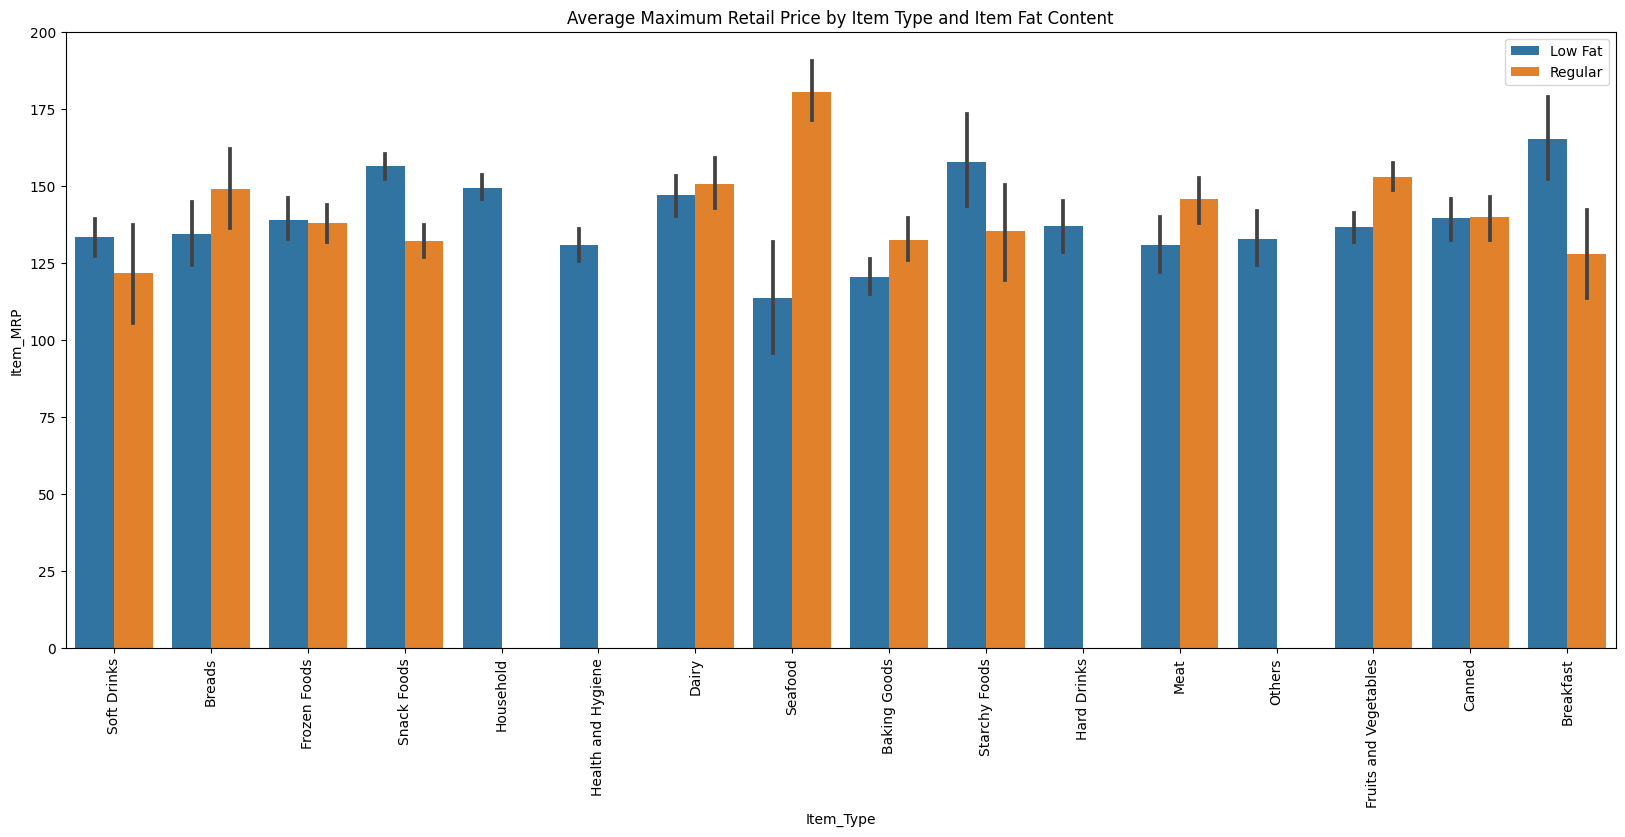

In [141]:
# dftest = dftest.sort_values(by = 'Item_MRP')  ==> this kept giving me an error message that by is not
# but when I activiated this code, it worked: dftest = df.sort_values(by = 'Item_MRP')

dftest = dftest.sort_values(by = 'Item_MRP')
fig, ax = plt.subplots(figsize=(20,8));
sns.barplot(data = dftest, x = 'Item_Type', y = 'Item_MRP', hue = 'Item_Fat_Content')
plt.title('Average Maximum Retail Price by Item Type and Item Fat Content')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# **✅ Interpretation: The graph shows that the 4 items: Household, Health and Hygiene, Hard Drinks and Chers have no Regular fat, they are rather purely Low Fat. Additionally, Seafood and Breakfast are Regular and Low Fat, respectively**

# 2. Studying the Distribution through Treemap

# **❎ Justifying my decision of using a Treemap for 'Outlet_Type': I judge this feature ('Outlet_Type') to be important in my future predictions of the role it plays in increasing sales.**

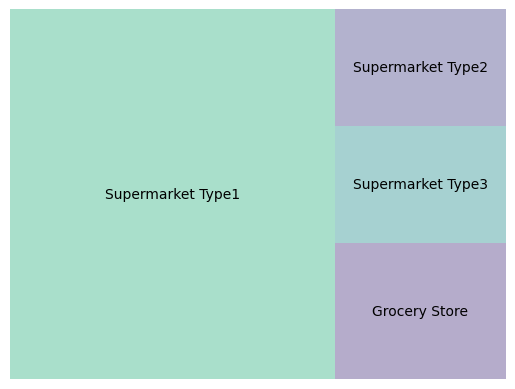

In [33]:
!pip install squarify # I needed this cade to call squarify
import squarify

df_treemap = df['Outlet_Type'].value_counts();

squarify.plot(sizes=df_treemap, label=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'], alpha=.4);
plt.axis('off')
plt.show();

# **✅ Interpretation: Supermarket Type 1 is the most frequent Outlet-type that is in our dataset.**

# 3. Correlation - Chart Type: Heatmap

# **❎ Justifying my decision of using a Heatmap: I judge that the best way to visualize correlation between the features of my dataframe is by using a heatmap.**

In [34]:
# I am searching for the correlation between all numercial values in my df dataframe
correlation = df.corr()
correlation

<ipython-input-34-78759a98e65a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


<ipython-input-35-8fa03c23cf12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues', annot=True);


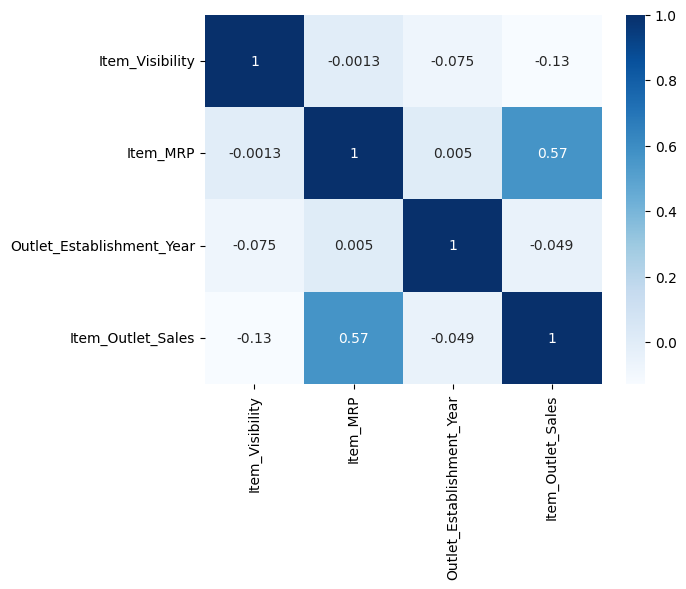

In [35]:
sns.heatmap(df.corr(),cmap='Blues', annot=True);

# ✅ Interpretation: I will focus my attention on Item_Outlet_Sales and link the other 3 elements to it as I interpret the results, since it is the ultimate target variable to be predicted. the As per the heatmap results:

# **+ With a positive correlation of 0.57, Item_MRP and Item_Outlet_Sales moderately correlate.**
# **+ With a negative correlation of -0.13 and -0.049 between Item_Visibility and Outlet_Establishment_Year respectively with Item_Outlet_Sales.**

# **==> Conclusion: The more the product is high in price, the more it is sold.**

# 4. Studying the Distribution through Histograms

# ❎ Justifying my decision of using a histogram for 'Item_Outlet_Sales': I judge this feature ('Item_Outlet_Sales') to be important since it is the target variable to be predicted.

In [36]:
mean_sales = df['Item_Outlet_Sales'].mean()
mean_sales

2181.288913575032

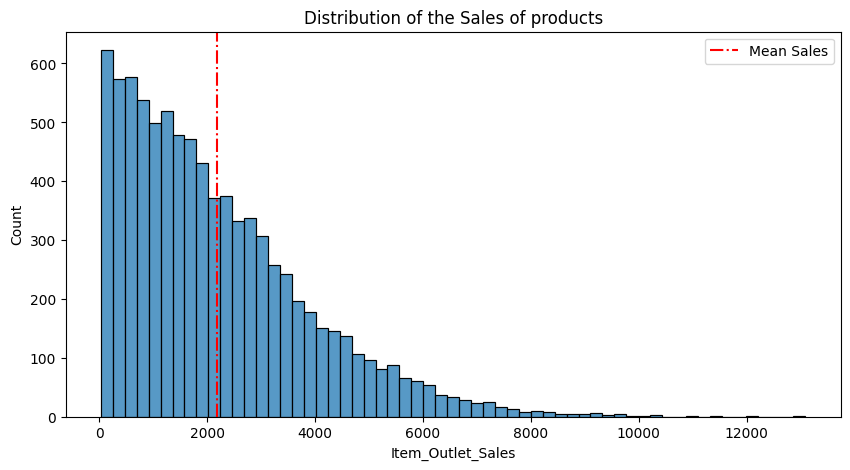

In [37]:
fig, ax = plt.subplots(figsize=(10,5));
sns.histplot(data=df, x='Item_Outlet_Sales', ax=ax)
ax.set(title='Distribution of the Sales of products');
mean_price = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_sales,color='red', ls='dashdot',
           label= "Mean Sales");
ax.legend();


#✅ **The distribution of the Sales of products is right skewed to indicate that there is "a limit on the minimum possible value but no limit on the maximum possible value".**